# Summary Statistics and Model Interpretation

Generating summary statistics and exploratory figures for interpreting model performance

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Packages and Directories
from setup.utils import *

# Summary statistics
import explore.sumstat as sumstat

# Model Interpretation
import explore.interpret as itp


/Users/RossChu/Library/Caches/pypoetry/virtualenvs/referrals-T7nVsAsO-py3.10/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Load trained model and data

In [3]:
# Load data on referral requests and offers
posts = pd.read_csv(f"{CLEAN}/posts.csv")
basic = pd.read_csv(f"{CLEAN}/posts_basic.csv")
basic = basic[['post_id','num_offers','referral_request']]
posts = posts.merge(basic, on='post_id', how='left')
cmts = pd.read_csv(f"{CLEAN}/comments.csv")

In [4]:
# Train model, data, and predicted probabilities
data = joblib.load(f'{TRAIN}/data.joblib')
predmod = joblib.load(f'{TRAIN}/model.joblib')
proba = pd.read_csv(f"{TRAIN}/predict_proba.csv")

### Distribution of Engagement Metrics

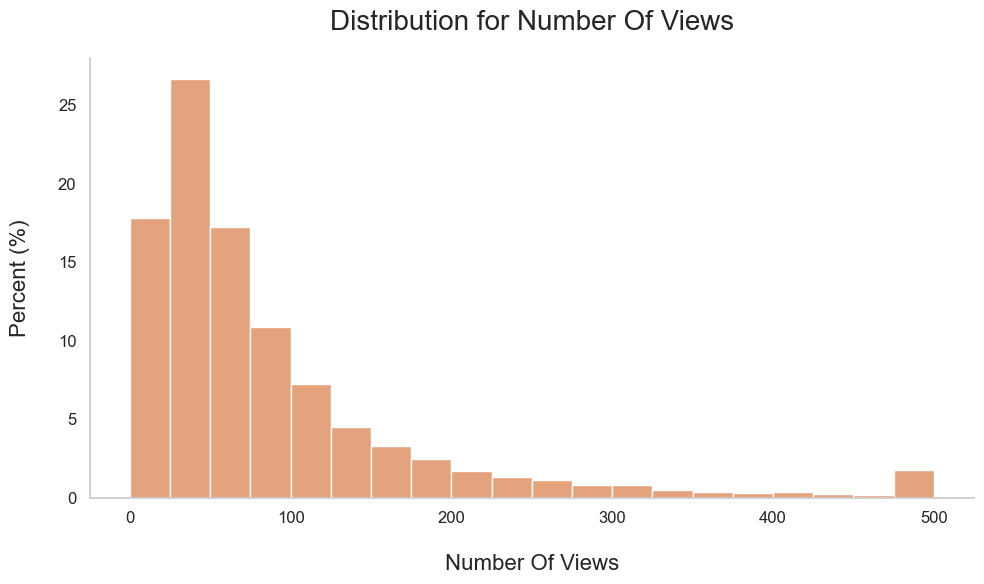

In [6]:
sumstat.distribution_metrics(posts, 'num_views', color=sns.color_palette()[1])

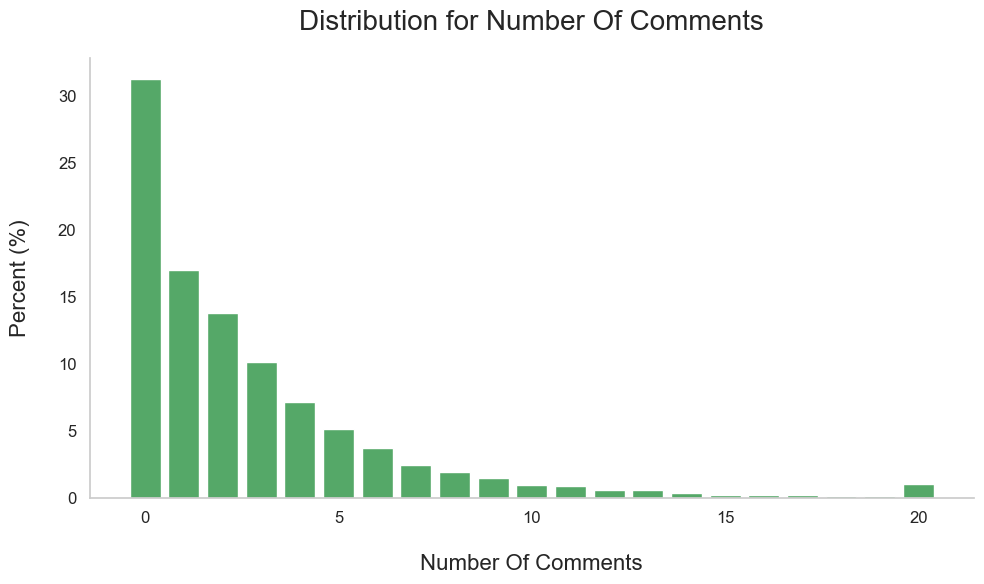

In [7]:
sumstat.distribution_metrics(posts, 'num_comments', color=sns.color_palette()[2])

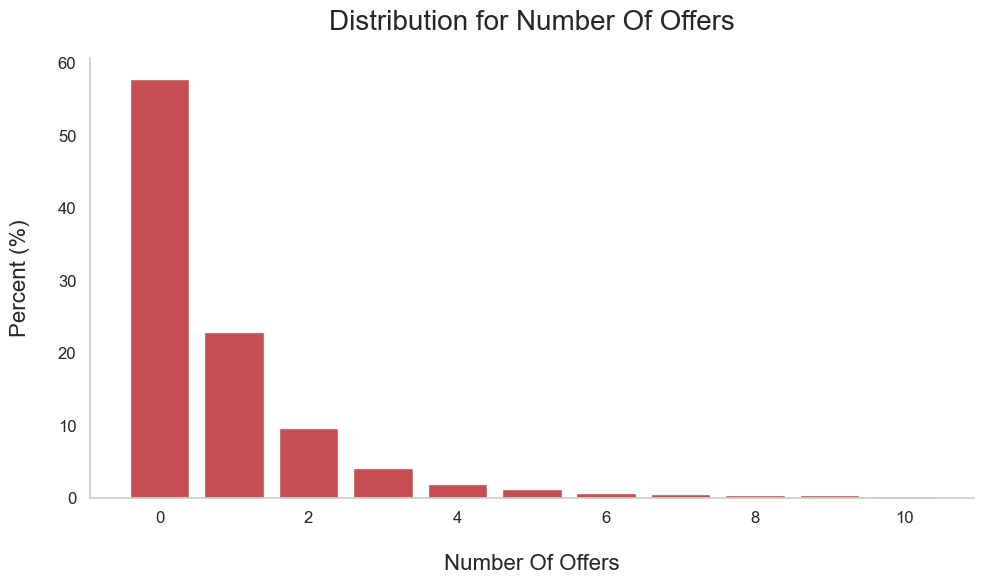

In [8]:
sumstat.distribution_metrics(posts, 'num_offers', color=sns.color_palette()[3])

### Time Series of Referral Requests

/Users/RossChu/Library/CloudStorage/GoogleDrive-ross.hm.chu@gmail.com/My Drive/Research_Projects/Referrals/code/explore/sumstat.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
/Users/RossChu/Library/CloudStorage/GoogleDrive-ross.hm.chu@gmail.com/My Drive/Research_Projects/Referrals/code/explore/sumstat.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['week'] = df['date'] - df['date'].dt.weekday * pd.Timedelta(days=1)


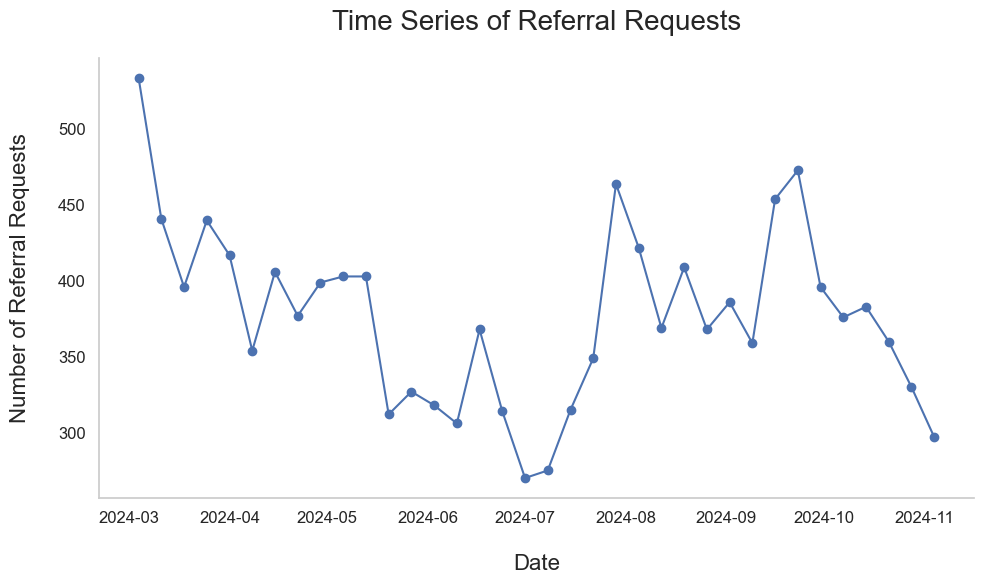

In [9]:
sumstat.requests_time_series(posts)

### Distribution of User Activity Across Firms

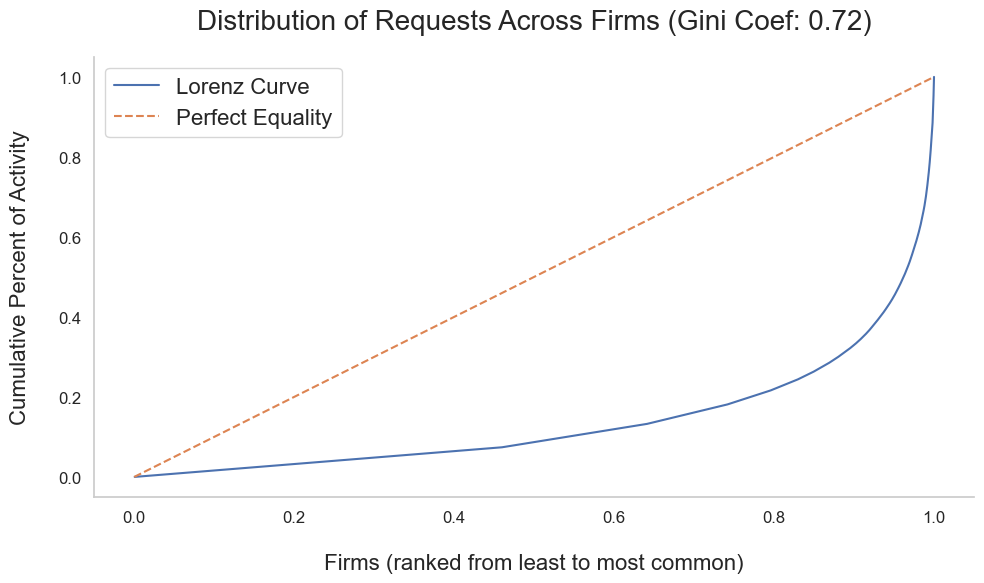

In [10]:
# Referral Requests
requests = posts[posts['referral_request']].copy()
sumstat.gini_curve(requests, label='requests')

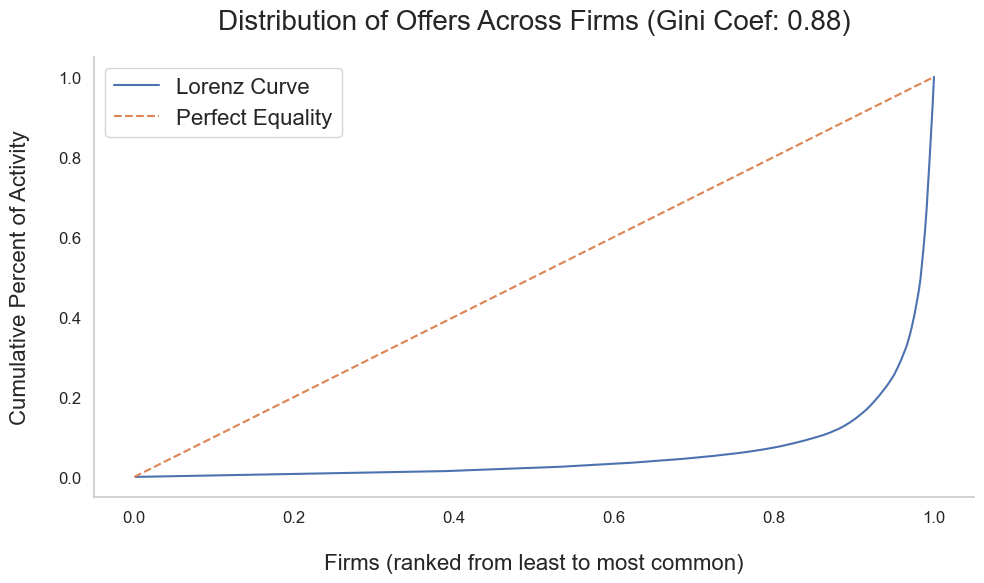

In [11]:
# Referral Offers
offers = cmts[cmts['referral_offer']].copy()
sumstat.gini_curve(offers, label='offers')

### Predicted Probabilities Across Models

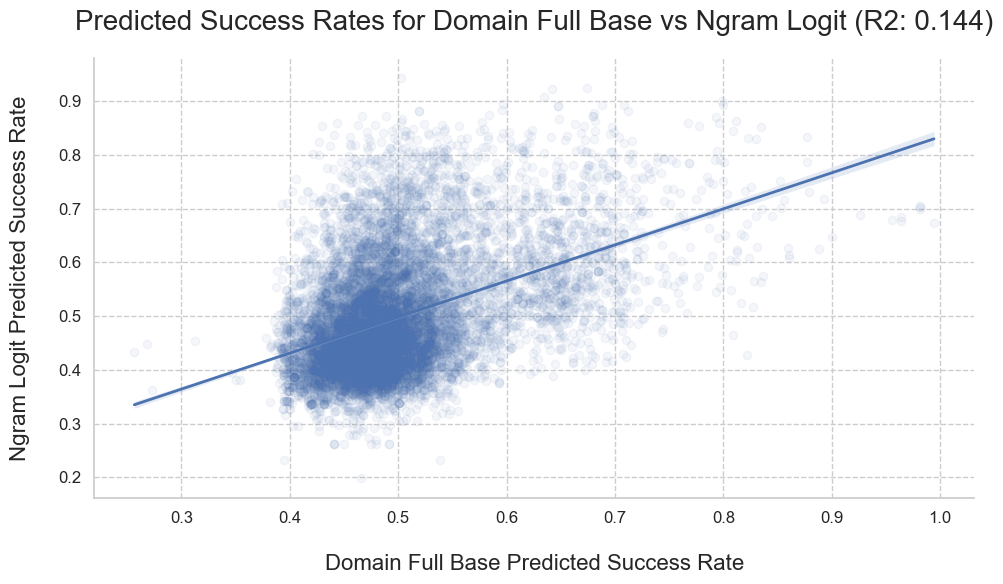

In [12]:
itp.relate_proba(proba, mod1='domain_full_base', mod2='ngram_logit')

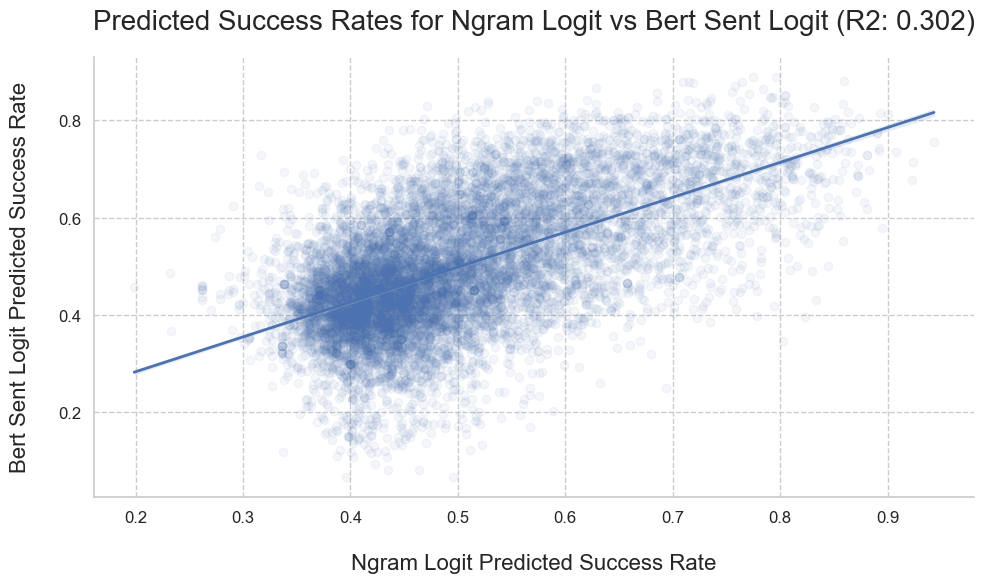

In [13]:
itp.relate_proba(proba, mod1='ngram_logit', mod2='bert_sent_logit')

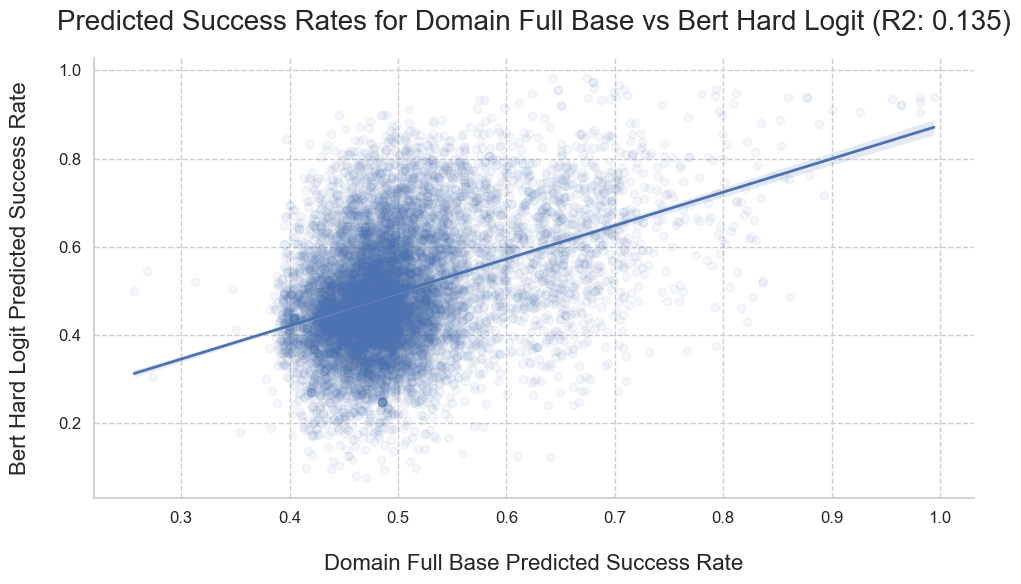

In [14]:
itp.relate_proba(proba, mod1='domain_full_base', mod2='bert_hard_logit')

### Coefficients & Standard Errors from Featurized Model

In [15]:
coefs_domain_full_base = itp.sparse_coefs(
    data, predmod, model_name = 'domain_full_base', 
    stderr=True, var_thresh=True
)
coefs_domain_full_base.to_csv(f"{OUTPUT}/interpret/coefs_domain_full_base.csv", index=False)

Optimization terminated successfully.
         Current function value: 0.679856
         Iterations 5

22 non-zero coefs

                           Logit Regression Results                           
Dep. Variable:           class_offers   No. Observations:                11358
Model:                          Logit   Df Residuals:                    11335
Method:                           MLE   Df Model:                           22
Date:                Mon, 06 Oct 2025   Pseudo R-squ.:                 0.01506
Time:                        23:02:29   Log-Likelihood:                -7721.8
converged:                       True   LL-Null:                       -7839.9
Covariance Type:            nonrobust   LLR p-value:                 8.346e-38
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.3645      0.040     -9.

In [16]:
coefs_domain_full_base.sort_values(['statsig','coefs'], ascending=False).head(500)[['names','coefs','sterr','statsig','pvals']]

,names,coefs,sterr,statsig,pvals
0,below5_pip,0.8540000,0.2720000,True,0.0020000
1,below5_layoff,0.7530000,0.1330000,True,0.0000000
2,reason_for_...,0.6600000,0.0850000,True,0.0000000
3,below5_inte...,0.3080000,0.1210000,True,0.0110000
4,familiarity,0.1720000,0.0590000,True,0.0040000
5,politeness,0.1540000,0.0770000,True,0.0450000
6,gratitude,0.1320000,0.0390000,True,0.0010000
7,spell_errors,0.0920000,0.0310000,True,0.0040000
8,post_length,-0.0840000,0.0310000,True,0.0060000
9,type_token_...,-0.1320000,0.0230000,True,0.0000000


### Identify predictive terms from n-gram models

- Coefficients below are effects on log odds for success.
- They are non-zero coefs selected from a L1-penalized logistic regression.
- Expect coef magnitudes to be biased towards zero due to the penalty term.

In [17]:
rank = itp.sparse_coefs(data, predmod, 'ngram_logit')
rank.to_csv(f"{OUTPUT}/interpret/rank_ngram.csv", index=False)

In [18]:
rank.head(50)

,terms,coefs
0,jobhunt,3.6110000
1,[ORG] [ORG],3.3240000
2,lay,2.7270000
3,company,2.6570000
4,layoff,1.9790000
5,mongodb,1.8370000
6,currently,1.7690000
7,[ROLE],1.5280000
8,willing pro...,1.3720000
9,[YEARS],1.3080000


In [19]:
rank.tail(50).sort_values(by='coefs', ascending=True)

,terms,coefs
75,summer [ICL...,-0.7710000
74,interested,-0.7700000
73,[CONTENT] look,-0.7320000
72,[ORG] [CONT...,-0.7090000
71,look [ORG],-0.6770000
70,referral [ORG],-0.5900000
69,work,-0.5300000
68,[ORG],-0.4980000
67,thank YOE,-0.4900000
66,[TITLE] [ORG],-0.4810000
